## EXPLORATORY DATA ANALYSIS OF SOCIAL MEDIA ON IT'S USERS 

In [2]:
#importing the needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("mental_health.csv")
df.head()

,person_name,age,date,gender,platform,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level,mental_state
0,Reyansh Ghosh,35,1/1/2024,Male,Instagram,320,160,1,2,7.4,28,2,7,6,Stressed
1,Neha Patel,24,1/12/2024,Female,Instagram,453,226,1,3,6.7,15,3,8,5,Stressed
2,Ananya Naidu,26,1/6/2024,Male,Snapchat,357,196,1,2,7.2,24,3,7,6,Stressed
3,Neha Das,66,1/17/2024,Female,Snapchat,190,105,0,1,8.0,41,2,6,6,Stressed
4,Reyansh Banerjee,31,1/28/2024,Male,Snapchat,383,211,1,2,7.1,22,3,7,6,Stressed


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_name                  5000 non-null   object 
 1   age                          5000 non-null   int64  
 2   date                         5000 non-null   object 
 3   gender                       5000 non-null   object 
 4   platform                     5000 non-null   object 
 5   daily_screen_time_min        5000 non-null   int64  
 6   social_media_time_min        5000 non-null   int64  
 7   negative_interactions_count  5000 non-null   int64  
 8   positive_interactions_count  5000 non-null   int64  
 9   sleep_hours                  5000 non-null   float64
 10  physical_activity_min        5000 non-null   int64  
 11  anxiety_level                5000 non-null   int64  
 12  stress_level                 5000 non-null   int64  
 13  mood_level        

In [5]:
df = df.dropna(subset=['platform', 'gender'])

In [6]:
df.isnull().sum()

person_name                    0
age                            0
date                           0
gender                         0
platform                       0
daily_screen_time_min          0
social_media_time_min          0
negative_interactions_count    0
positive_interactions_count    0
sleep_hours                    0
physical_activity_min          0
anxiety_level                  0
stress_level                   0
mood_level                     0
mental_state                   0
dtype: int64

In [7]:
df.describe()

,age,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,29.947800,373.058200,175.331600,0.864200,1.835400,7.134660,22.693400,2.510400,7.107600,5.625800
std,12.279936,106.003916,71.209329,0.555176,0.943443,0.533184,10.602862,0.794996,1.062378,0.759928
min,13.000000,140.000000,35.000000,0.000000,0.000000,6.400000,8.000000,1.000000,5.000000,4.000000
25%,21.000000,310.000000,118.000000,1.000000,1.000000,6.700000,14.000000,2.000000,6.000000,5.000000
50%,27.000000,388.000000,170.000000,1.000000,2.000000,7.100000,21.000000,3.000000,7.000000,6.000000
75%,35.250000,461.000000,231.000000,1.000000,2.000000,7.450000,29.000000,3.000000,8.000000,6.000000
max,69.000000,520.000000,338.000000,2.000000,4.000000,8.300000,46.000000,4.000000,9.000000,7.000000


In [37]:
df.duplicated().sum()

0

In [39]:
# STEP 4 — Map Mental State to Numeric (Optional)
mental_map = {
    "Healthy": 0,
    "Stressed": 1,
    "At_Risk": 1   # Combine "At_Risk" with "Stressed" for simplicity
}

df["mental_state_num"] = df["mental_state"].map(mental_map)

# Check mapping
df[["mental_state", "mental_state_num"]].head()


,mental_state,mental_state_num
0,Stressed,1
1,Stressed,1
2,Stressed,1
3,Stressed,1
4,Stressed,1


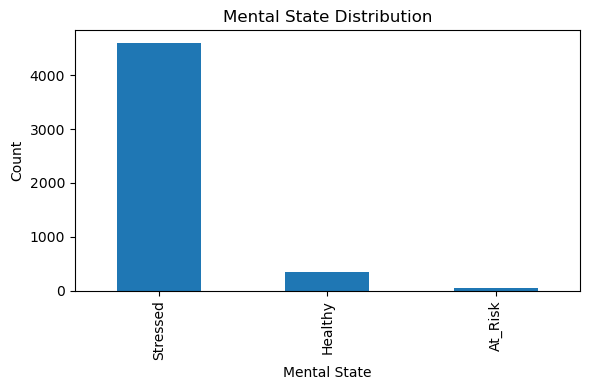

In [50]:
plt.figure(figsize=(6,4))
df['mental_state'].value_counts().plot(kind='bar')
plt.xlabel('Mental State')
plt.ylabel('Count')
plt.title('Mental State Distribution')
plt.tight_layout()
plt.show()

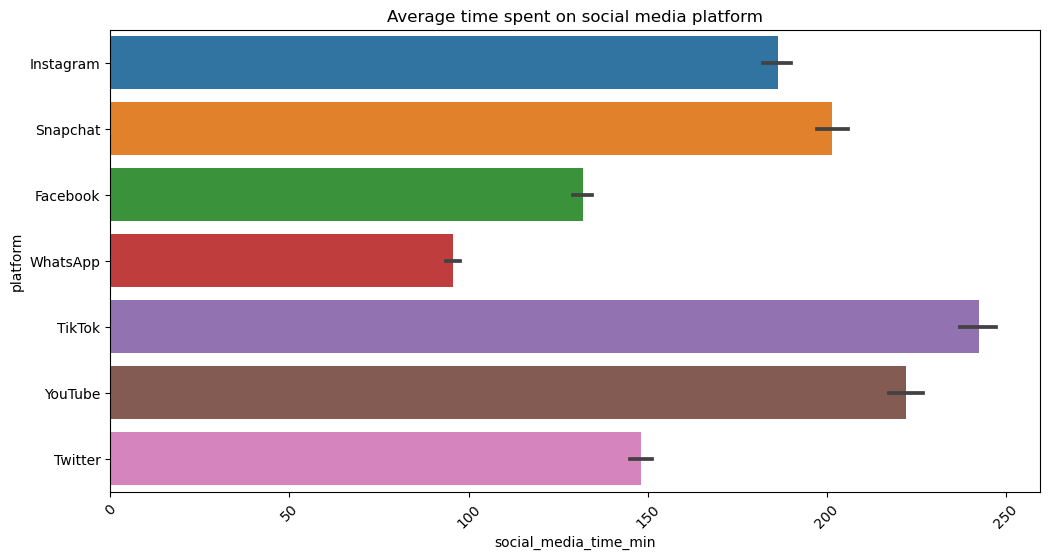

In [43]:
plt.figure(figsize=(12,6))
sns.barplot(data=df,x='social_media_time_min',y='platform')
plt.title('Average time spent on social media platform')
plt.xticks(rotation=45)
plt.show()

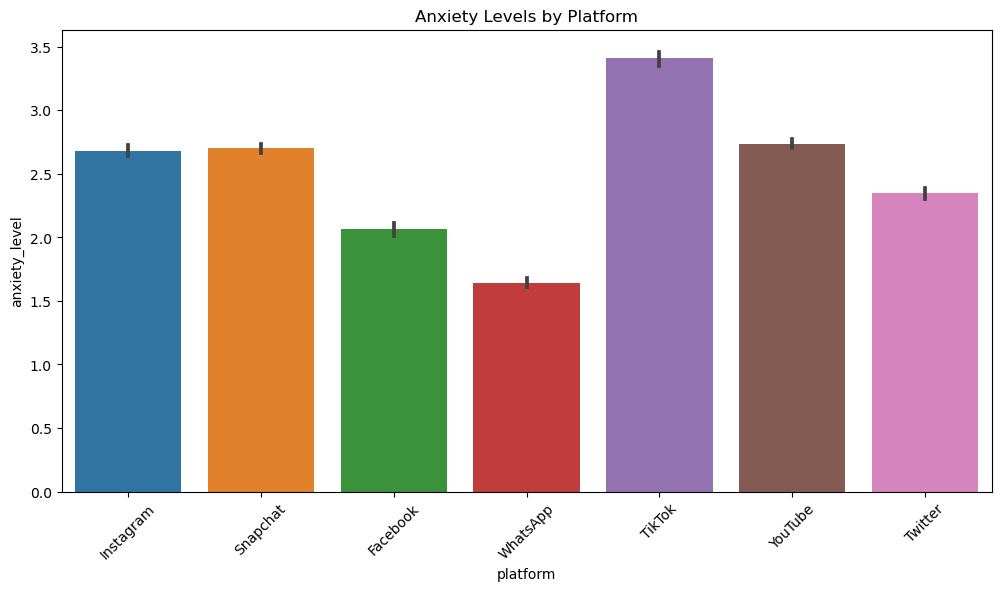

In [26]:
# Anxiety level across usage categories
plt.figure(figsize=(12,6))
sns.barplot(data=df, x="platform", y="anxiety_level")
plt.title("Anxiety Levels by Platform")
plt.xticks(rotation=45)
plt.show()